# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# CSV FILE SELCTION

In [14]:
def select_file():
    root = Tk()
    root.withdraw()  # Hide the main Tkinter window
    file_path = askopenfilename(title="Select CSV File", filetypes=[("CSV Files", "*.csv")])
    return file_path

# Prompt user to select a file
file_path = select_file()
if not file_path:
    print("No file selected. Exiting...")
    exit()


# DATA SET LOADING AND PREPROCESSING

In [15]:
# Load the dataset
data = pd.read_csv(file_path)

# Drop the Story_ID column (non-numeric data)
X = data.drop(columns=["Story_ID"])

data.head()

,Story_ID,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
0,Story_1,1,1,1,1,1,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,Story_2,1,0,1,1,1,0,0,1,1,...,1,1,1,1,0,0,1,0,0,0
2,Story_3,1,0,0,1,1,1,0,0,1,...,1,1,0,0,1,0,0,1,0,1
3,Story_4,1,1,1,0,0,1,0,0,1,...,1,0,0,1,1,1,1,0,0,0
4,Story_5,0,0,1,0,0,1,0,1,0,...,0,1,0,1,1,1,1,1,0,1


In [16]:
X.head()

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
0,1,1,1,1,1,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,1,0,1,1,1,0,0,1,1,1,...,1,1,1,1,0,0,1,0,0,0
2,1,0,0,1,1,1,0,0,1,0,...,1,1,0,0,1,0,0,1,0,1
3,1,1,1,0,0,1,0,0,1,0,...,1,0,0,1,1,1,1,0,0,0
4,0,0,1,0,0,1,0,1,0,1,...,0,1,0,1,1,1,1,1,0,1


In [17]:
X.describe()

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.733333,0.333333,0.733333,0.600000,0.733333,0.533333,0.400000,0.733333,0.666667,0.400000,...,0.400000,0.466667,0.466667,0.666667,0.666667,0.533333,0.600000,0.666667,0.400000,0.533333
std,0.457738,0.487950,0.457738,0.507093,0.457738,0.516398,0.507093,0.457738,0.487950,0.507093,...,0.507093,0.516398,0.516398,0.487950,0.487950,0.516398,0.507093,0.487950,0.507093,0.516398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# SCATTER PLOT FOR INITIAL VISUALIZATION

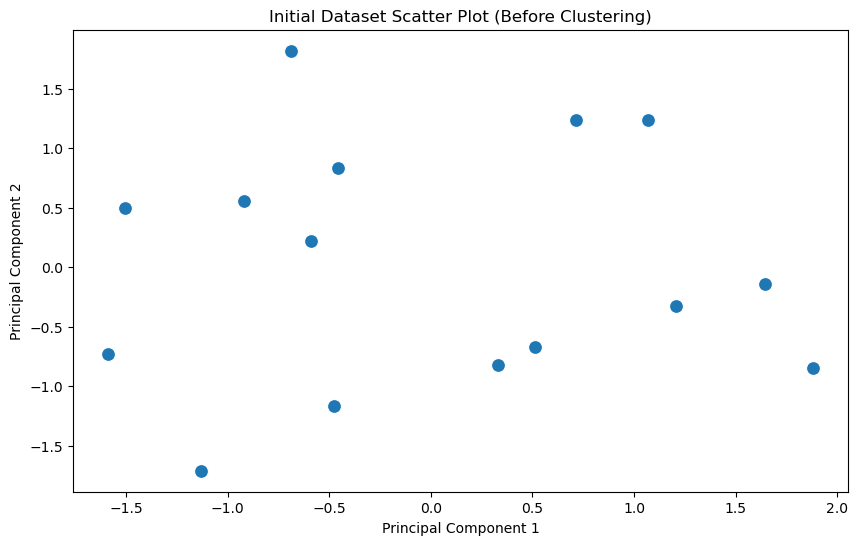

In [18]:
# Scatter plot of the dataset (initial visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=100)
plt.title("Initial Dataset Scatter Plot (Before Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# HDBSCAN Clustering

In [39]:
# Perform HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=3, metric="euclidean")
labels = clusterer.fit_predict(X)

# Add cluster labels to the dataset
data["Cluster"] = labels

# SCATTER PLOT AFTER CLUSTERING

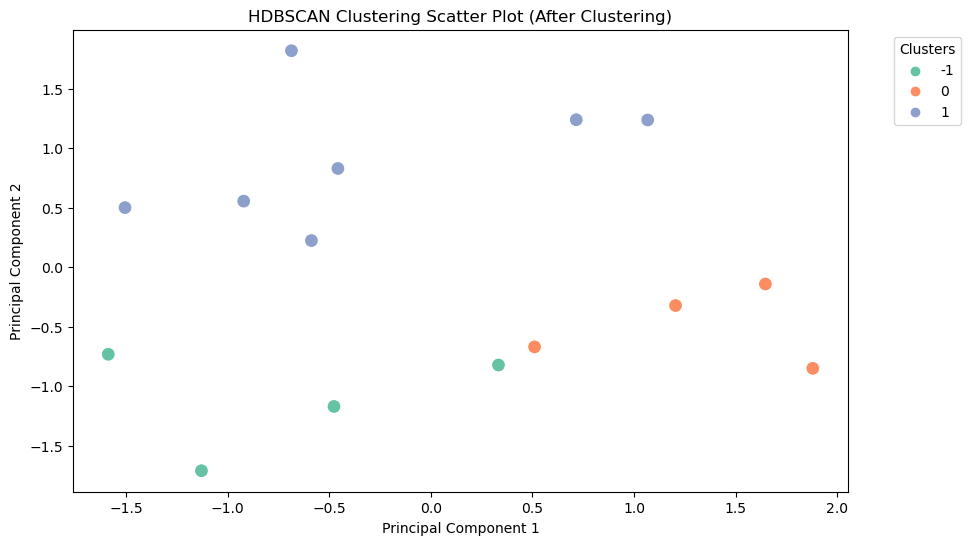

In [40]:
# Scatter plot after clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2", s=100)
plt.title("HDBSCAN Clustering Scatter Plot (After Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# CONDENSED HIERACHY PLOT

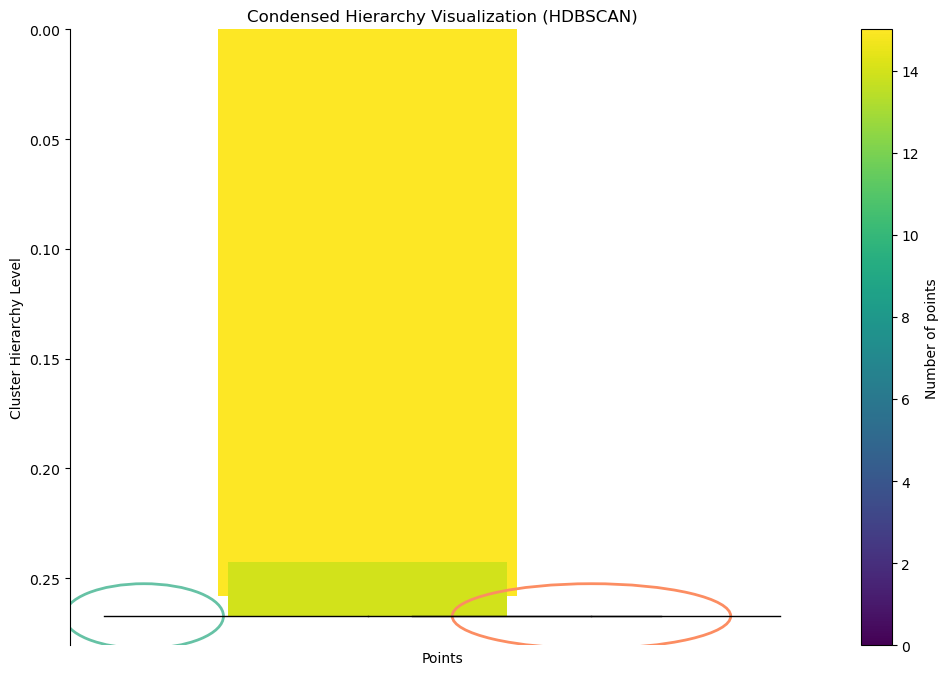

In [41]:
# Plot condensed hierarchy (HDBSCAN's version of a dendrogram)
plt.figure(figsize=(12, 8))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette("Set2"))
plt.title("Condensed Hierarchy Visualization (HDBSCAN)")
plt.xlabel("Points")
plt.ylabel("Cluster Hierarchy Level")
plt.show()

# HDBSCAN EVALUATION

In [42]:
# Evaluate clustering performance
if len(set(labels)) > 1:  # Ensure more than one cluster exists
    silhouette_avg = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
else:
    silhouette_avg, calinski_harabasz, davies_bouldin = None, None, None

print("Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

Evaluation Metrics:
Silhouette Score: 0.06749111472256299
Calinski-Harabasz Score: 1.882802547770701
Davies-Bouldin Score: 2.1384140615512632
